<h1><center>Contributions to presidential campaings in the state of Arizona in 2016</center></h1>

### Author: Julio Cárdenas-Rodríguez  
#### Contact: jdatascientist@gmail.com
### Source: [ftp://ftp.fec.gov/FEC/Presidential_Map/2016/P00000001/P00000001-AZ.zip](ftp://ftp.fec.gov/FEC/Presidential_Map/2016/P00000001/P00000001-AZ.zip)
### Description: 

### 0. Load data and modules

In [1]:
#modules
import pandas as pd
import seaborn as sns; # sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
#data
file='P00000001-AZ.csv'; AZ_df=pd.read_csv(file,index_col=False)
# drop columns we won't need
AZ_df=AZ_df.drop(['cand_id','contbr_st','cand_id','receipt_desc',
            'receipt_desc','memo_text','form_tp','file_num','tran_id','memo_cd'],axis=1)

AZ_df=AZ_df.rename(columns={'contb_receipt_amt': 'dollars' ,
                      'contb_receipt_dt': 'date',
                      'contbr_city': 'city',
                      'contbr_zip': 'zip_code',
                       'election_tp': 'election_type'}) 
AZ_df.head(1)

,cmte_id,cand_nm,contbr_nm,city,zip_code,contbr_employer,contbr_occupation,dollars,date,election_type
0,C00580100,"Trump, Donald J.","RODAK, FRED",KINGMAN,86401.0,INFORMATION REQUESTED,INFORMATION REQUESTED,70.5,23-OCT-16,G2016


### 1. Perform Sanity checks

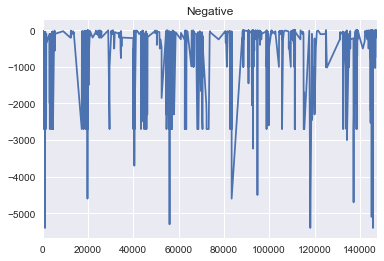

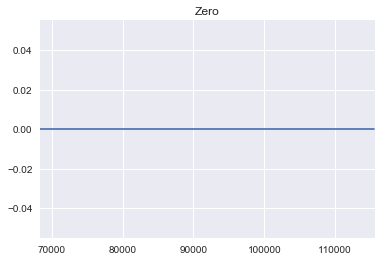

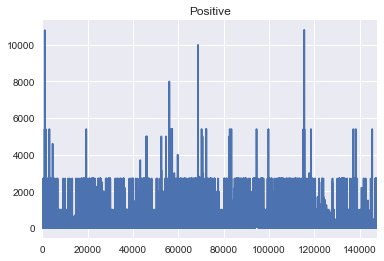

In [2]:
# Do I have any negative or zero contributions?
bol=AZ_df.dollars<0
plt.figure(); AZ_df[bol].dollars.plot(); plt.title('Negative')


bol=AZ_df.dollars==0
plt.figure()
AZ_df[bol].dollars.plot(); plt.title('Zero')

bol=AZ_df.dollars>0
plt.figure(); AZ_df[bol].dollars.plot();  plt.title('Positive')

# Remove all zero and negative data points
AZ_df=AZ_df[bol];

### 2. Transform all names in Last Names (easier to call data)

In [3]:
last_names=AZ_df.cand_nm.values;
for idx, name in enumerate(last_names):
    last_names[idx] = name.split(',')[0] 
    
AZ_df['candidate']=last_names;

### 3. How many contributions did each candidate collect?

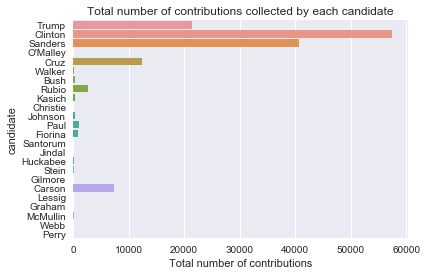

In [4]:
sns.countplot(y="candidate",data=AZ_df);
plt.title("Total number of contributions collected by each candidate");
plt.xlabel("Total number of contributions");

### 4.What was the median contribution for each candidate ?

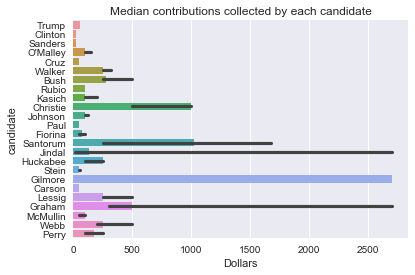

In [5]:
sns.barplot(y="candidate", x="dollars", data=AZ_df,estimator=np.median)
plt.title("Median contributions collected by each candidate");
plt.xlabel("Dollars");

### 5. What was the amount in dollars received by each candidate ?

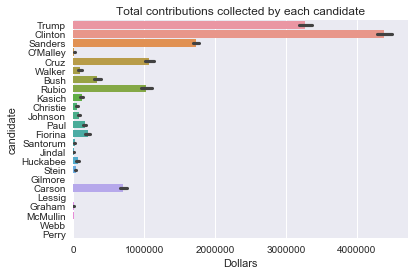

In [6]:
sns.barplot(y="candidate", x="dollars", data=AZ_df,estimator=np.sum)
plt.title("Total contributions collected by each candidate");
plt.xlabel("Dollars");

### 6. How much did retired people contributed to each campaing?

In [ ]:
retired_bol=AZ_df.contbr_occupation.values=='RETIRED';
Info_req_bol=AZ_df.contbr_occupation.values=='INFORMATION REQUESTED';
other_bol= (AZ_df.contbr_occupation.values!='RETIRED') | (AZ_df.contbr_occupation.values!='INFORMATION REQUESTED');
AZ_df['Occupation']='Other';
AZ_df.Occupation[Info_req_bol]='Unk';
AZ_df.Occupation[retired_bol]='Retired';

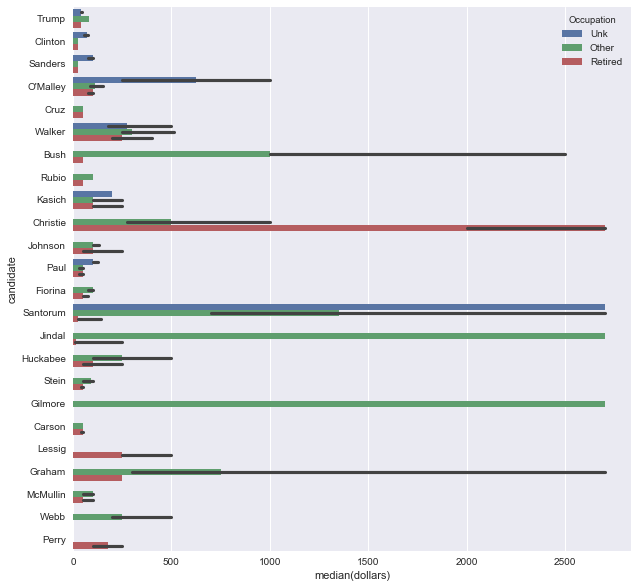

In [8]:
plt.figure(figsize=(10, 10))
sns.barplot(hue="Occupation", x="dollars",y='candidate',data=AZ_df,estimator=np.median)

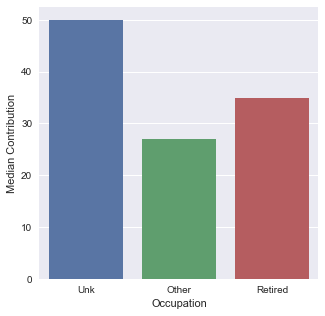

In [9]:
plt.figure(figsize=(5, 5))
sns.barplot(x="Occupation", y="dollars",data=AZ_df,estimator=np.median)
plt.ylabel('Median Contribution')

## X. How did the contributions evolved over time?

In [10]:
# DEfine function to plot weekly
def df_2_week(df):
    df['Time']=pd.to_datetime(df.date)
    bol= (df.Time>= pd.to_datetime( '2016-1-1') )
    df=df[bol]
    ts_df=pd.DataFrame()
    ts_df['Week']= df.Time.dt.weekofyear
    ts_df['Dollars']=df.dollars
    ts_df.tail(2)
    return ts_df.groupby('Week').sum()
    
    

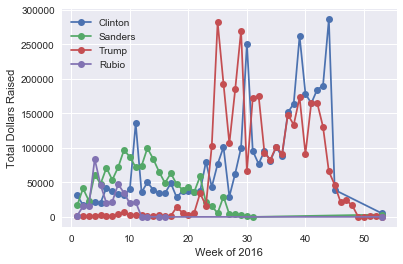

In [11]:
some_people=['Clinton','Sanders','Trump','Rubio']
plt.figure('Weekly');
for p  in some_people:
    d=df_2_week(AZ_df[AZ_df.cand_nm==p][ ['dollars','date']])
    plt.plot(d.index,d.Dollars.values,'o-');

plt.legend(some_people); plt.xlabel('Week of 2016') ;plt.ylabel('Total Dollars Raised') 

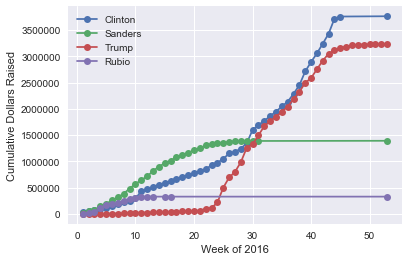

In [12]:
some_people=['Clinton','Sanders','Trump','Rubio']
plt.figure('Weekly_Cumsum');
for p  in some_people:
    d=df_2_week(AZ_df[AZ_df.cand_nm==p][ ['dollars','date']])
    plt.plot(d.index,np.cumsum(d.Dollars.values),'o-');

plt.legend(some_people); plt.xlabel('Week of 2016') ;plt.ylabel('Cumulative Dollars Raised') 